In [9]:
from pathlib import Path
import sys, importlib.util, os
parentPath = Path.cwd().parent
sys.path.insert(0, str(parentPath))  

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from utils.encoding import compute_directional_threat, Ship, Asteroid
from utils.visualize import visualize_game
import math

Threats: (0.48570909412997004, 0.37252321073311145, 0.31141017340325616)


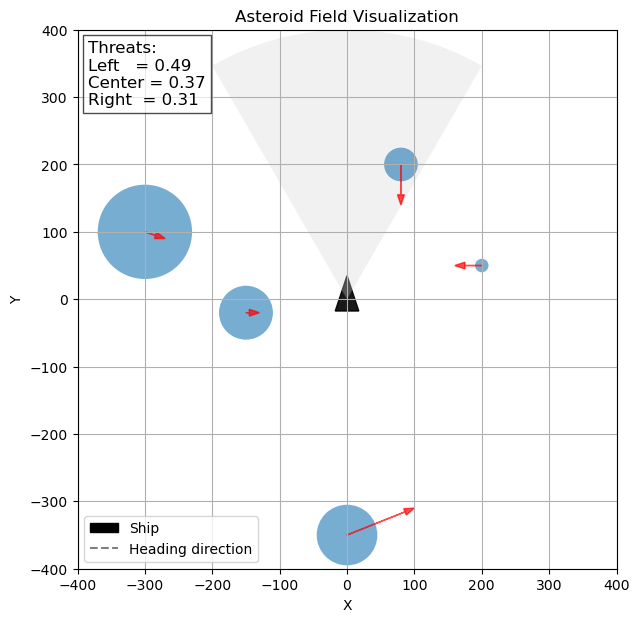

In [102]:
ship = Ship(x=0, y=0, vx=0, vy=0, heading=math.radians(90))

asteroids = [
    Asteroid(x=200, y=50, vx=-20, vy=0, size=10),
    Asteroid(x=-150, y=-20, vx=10, vy=0, size=40),
    Asteroid(x=80, y=200, vx=0, vy=-30, size=25),
    Asteroid(x=-300, y=100, vx=15, vy=-5, size=70),
    Asteroid(x=0, y=-350, vx=50, vy=20, size=45),
]

d_threat = compute_directional_threat(
    ship, asteroids, max_dist=400, max_size=50
)

print("Threats:", d_threat)

visualize_game(ship, asteroids, d_threat=d_threat)